In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation
from keras.losses import mean_absolute_error

Using TensorFlow backend.


In [2]:
plt.ion()

In [3]:
plt.rcParams["figure.figsize"] = (18,9)

#### Data with many null values

In [4]:
bs_df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv')

### First 20 instances

In [5]:
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv',
                 dtype={
                     'Timestamp': np.int64,
                     'Open': np.float64,
                     'High': np.float64,
                     'Low': np.float64,
                     'Close': np.float64,
                     'Volume_(BTC)': np.float64,
                     'Volume_(Currency)': np.float64,
                     'Weighted_Price': np.float64
                 }).sort_values(by=['Timestamp'])

In [6]:
df = df.set_index('Timestamp')

# Ensure that there exists an instance for each minute
df = df.reindex(range(df.index[0], df.index[-1], 60), fill_value=np.nan)

df.reset_index(level=0, inplace=True)

df['Timestamp'] = df['Timestamp'].apply(lambda t: datetime.utcfromtimestamp(t))

df.head(20)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-01 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-01 05:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-01 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-12-01 05:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-12-01 05:39:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-12-01 05:40:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,2014-12-01 05:41:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-12-01 05:42:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Step at 1minute granularity

### First 20 instances after the interpolation

In [7]:
df.interpolate(inplace=True)
df.head(20)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000
1,2014-12-01 05:34:00,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000
2,2014-12-01 05:35:00,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000
3,2014-12-01 05:36:00,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000
4,2014-12-01 05:37:00,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000
5,2014-12-01 05:38:00,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000
6,2014-12-01 05:39:00,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000
7,2014-12-01 05:40:00,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000
8,2014-12-01 05:41:00,301.590909,301.590909,301.590909,301.590909,0.01,3.015909,301.590909
9,2014-12-01 05:42:00,303.181818,303.181818,303.181818,303.181818,0.01,3.031818,303.181818


Number of instances

In [8]:
len(df)

2074707

Text(0, 0.5, 'Mean Price ($)')

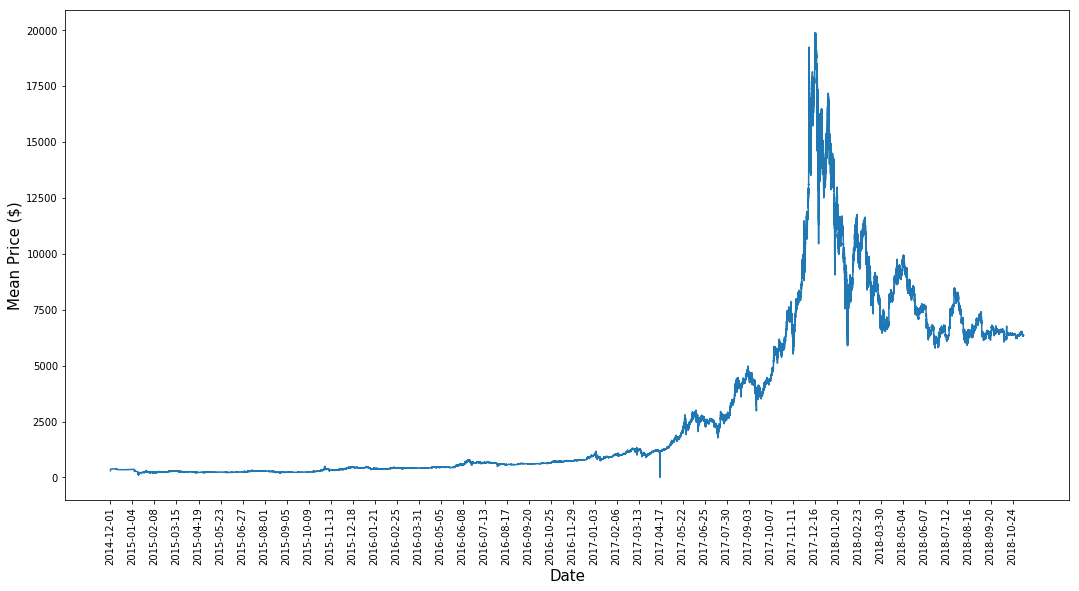

In [9]:
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
ts = df['Timestamp'].tolist()[::50000]
xticks = (t.strftime('%Y-%m-%d') for t in ts)
plt.xticks(range(0,df.shape[0],50000),xticks,rotation=90)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Mean Price ($)',fontsize=15)

### Map Data to Day granularity

In [10]:
df['Date'] = df['Timestamp'].apply(lambda t: t.date())
daily_info = df.groupby('Date').agg({
    'Open': lambda opens: opens.iloc[0],     # Opening value of the day
    'Close': lambda closes: closes.iloc[-1], # Closing value of the day
    'Low' : np.min,                          # Lowest value of the day
    'High': np.max,                          # Highest value of the day
    'Volume_(BTC)': np.sum                   # Sum of the volumes of the minutes in the day
}).reset_index(level=0)
daily_info['Mean'] = (daily_info['High'] + daily_info['Close']) / 2
daily_info.head(20)

,Date,Open,Close,Low,High,Volume_(BTC),Mean
0,2014-12-01,300.000000,375.300221,300.000000,375.300221,21.873404,375.300221
1,2014-12-02,375.305372,377.958639,375.305372,378.000000,1941.398508,377.979319
2,2014-12-03,377.958464,377.667052,377.010000,378.000000,169.819855,377.833526
3,2014-12-04,377.661850,377.516951,377.100000,377.661850,15.942718,377.589400
4,2014-12-05,377.517264,377.968047,377.517264,377.968047,19.541246,377.968047
5,2014-12-06,377.968361,377.026909,377.026909,378.000000,69.366556,377.513455
6,2014-12-07,377.029428,375.979636,375.979636,377.029428,179.692800,376.504532
7,2014-12-08,375.985646,376.261203,375.000000,376.270654,289.471801,376.265929
8,2014-12-09,376.284210,395.789505,376.274764,395.790466,182.990802,395.789985
9,2014-12-10,395.804021,368.564913,360.500000,398.000000,27.285516,383.282456


In [11]:
len(daily_info) # Number of days for which data is present or interpolated

1441

## Observations

### Evaluating Time Series Forecasting

In time series forecasting we have to choose the input and the output of the model. We can choose for example to predict $x_{t + 1}$ at a given time $t$ by giving in input to the model $x_t$ or giving in input $(x_{t-k}, x_{t - k + 1},...,x_{t})$ where $k$ is the window size, i.e. how much of the past the predictor can observe. Both cases are called *One-Step Ahead* Forecasting.

This can be useful in some cases, such as weather forecasting. In the case of trading though, we would like to predict far in the future. This can be done by iteratively letting the model predict the next values based *not* on the actual values of the window but on the previously predicted values i.e. given in input $(\hat x_{t-k}, \hat x_{t - k + 1},..., \hat x_{t})$. [[1]](https://github.com/kmsravindra/ML-AI-experiments/blob/master/AI/LSTM-time_series/LSTM%20-%20Sine%20wave%20predictor.ipynb) [[2]](https://towardsdatascience.com/using-lstms-to-forecast-time-series-4ab688386b1f)

We must be careful on how we evaluate our model since what can happen is that we feed the network the actual data $(x_{t-k}, x_{t - k + 1},...,x_{t})$ for multiple values of $t$ producing the predicted values $\hat x_{t+1} \approx x_t, \hat x_{t+2} \approx x_{t+1}, \hat x_{t+3} \approx x_{t+2}, \hat x_{t+4} \approx x_{t+3}$ (similar to the *Persistence Model*) which produces a good result in terms of RMSE (since the data has some inertia in fluctuatng) but not really useful given that at each timestep the model can see the previous *actual* data and thus does not depend by previous wrong predictions. [[3]](https://dashee87.github.io/deep%20learning/python/predicting-cryptocurrency-prices-with-deep-learning/) [[4]](https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-11-20-predicting-cryptocurrency-prices-with-deep-learning.ipynb)

![lag](images/lag.png)

Alternatively we can perform a *Multi Step* Forecast i.e. letting the model predict the next $m$ values $x_{t+1}, ..., x_{t+m}$

### Data Preprocessing

Another issue we must consider is how to preprocess the data. We cannot normalize it over the full time period since given the spike of the BTC price in December 2017 a good portion of the data will be normalized close to 0.

A good way would be normalize the data in the time window, i.e. by representing each datapoint in the window as a ratio (positive or negative) of increase/decrease in value with respect to the first data point of the window. In this case the data points will be values in the range $[-1, 1]$ thus a good activation function would be $tanh$. [Function normalize_windows [5]](https://towardsdatascience.com/using-recurrent-neural-networks-to-predict-bitcoin-btc-prices-c4ff70f9f3e4#2dd7)

Another way can be differencing the data which means mapping point $x_t$ to $x_t' = x_t - x_{t-1}$

These processes are called making the data *stationary*, the data does not depend by trends.

The windows can either overlap or not [[6]](https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/)

## Model

In [12]:
IN_TIMESTEPS  = 15
OUT_TIMESTEPS = 1
TRAIN_RATIO = 0.7
X_cols = ["Open", "Close", "Mean"]
Y_cols = ["Mean"]

EPOCHS = 500
BATCH_SZ = 256

In [13]:
def as_strided(df, X_stride_len, Y_stride_len, X_cols, Y_cols):
    X = []
    Y = []
    for i in range(len(df) - X_stride_len - Y_stride_len + 1):
        X.append(df[X_cols].iloc[i : i + X_stride_len].values)
        Y.append(df[Y_cols].iloc[i + X_stride_len : i + X_stride_len + Y_stride_len].values.reshape(-1))
    
    Y = np.array(Y)
    return np.array(X), Y.reshape(-1,1) if Y_stride_len == 1 else Y

In [14]:
X_raw, Y_raw = as_strided(daily_info, IN_TIMESTEPS, OUT_TIMESTEPS, X_cols, Y_cols)

### Transform each window

Each window is "normalized" thus representing each value as percentage in increase or decrease of the first value in the window

$$
    w' = \frac{w}{w_0} - 1
$$

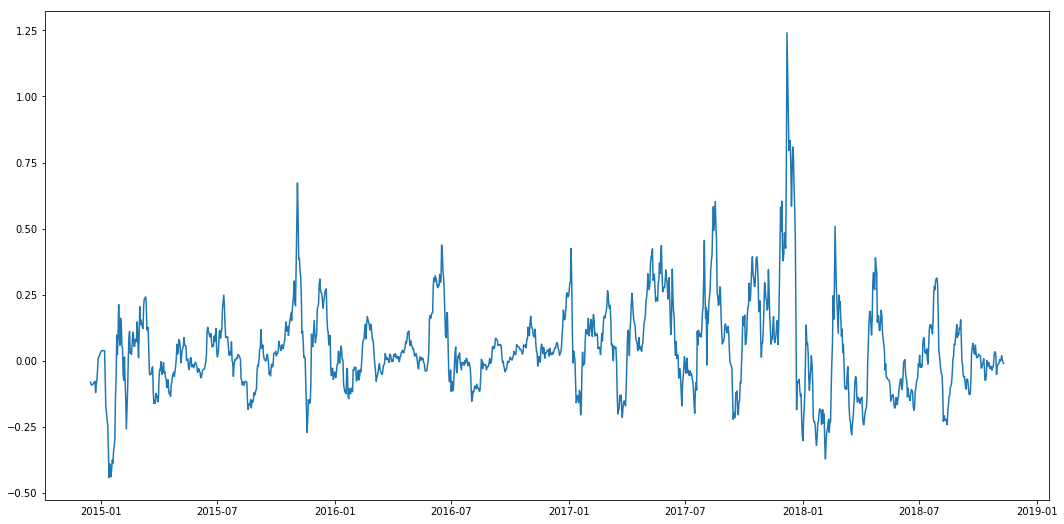

In [15]:
def transform_to_prc(w):
    return w / w[0] - 1

X = np.apply_along_axis(transform_to_prc, 1, X_raw)
Y = (Y_raw / X_raw[:,0,2].reshape((-1,1))) - 1

plt.plot(daily_info["Date"][IN_TIMESTEPS:].values, Y)

In [16]:
split = int(len(X) * TRAIN_RATIO)

X_raw_train, X_raw_test, Y_raw_train, Y_raw_test = X_raw[:split], X_raw[split:], Y_raw[:split], Y_raw[split:]
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]

In [17]:
def build_lstm_nn(out_size, timesteps, input_shape):
    model = Sequential()
    model.add(LSTM(
        out_size,
        input_shape=(timesteps, input_shape)
    ))
    return model

In [18]:
model = build_lstm_nn(OUT_TIMESTEPS, IN_TIMESTEPS, len(X_cols))

In [19]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [20]:
model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SZ)

Epoch 1/500
998/998 [==============================] - 1s 609us/step - loss: 0.1539
Epoch 2/500
998/998 [==============================] - 0s 40us/step - loss: 0.1521
Epoch 3/500
998/998 [==============================] - 0s 43us/step - loss: 0.1504
Epoch 4/500
998/998 [==============================] - 0s 40us/step - loss: 0.1487
Epoch 5/500
998/998 [==============================] - 0s 43us/step - loss: 0.1472
Epoch 6/500
998/998 [==============================] - 0s 40us/step - loss: 0.1458
Epoch 7/500
998/998 [==============================] - 0s 44us/step - loss: 0.1443
Epoch 8/500
998/998 [==============================] - 0s 48us/step - loss: 0.1431
Epoch 9/500
998/998 [==============================] - 0s 45us/step - loss: 0.1419
Epoch 10/500
998/998 [==============================] - 0s 40us/step - loss: 0.1408
Epoch 11/500
998/998 [==============================] - 0s 103us/step - loss: 0.1398
Epoch 12/500
998/998 [==============================] - 0s 90us/step - loss: 0.1388

998/998 [==============================] - 0s 89us/step - loss: 0.0880
Epoch 99/500
998/998 [==============================] - 0s 90us/step - loss: 0.0874
Epoch 100/500
998/998 [==============================] - 0s 89us/step - loss: 0.0868
Epoch 101/500
998/998 [==============================] - 0s 90us/step - loss: 0.0862
Epoch 102/500
998/998 [==============================] - 0s 84us/step - loss: 0.0856
Epoch 103/500
998/998 [==============================] - 0s 85us/step - loss: 0.0850
Epoch 104/500
998/998 [==============================] - 0s 80us/step - loss: 0.0845
Epoch 105/500
998/998 [==============================] - 0s 79us/step - loss: 0.0839
Epoch 106/500
998/998 [==============================] - 0s 80us/step - loss: 0.0833
Epoch 107/500
998/998 [==============================] - 0s 82us/step - loss: 0.0826
Epoch 108/500
998/998 [==============================] - 0s 88us/step - loss: 0.0820
Epoch 109/500
998/998 [==============================] - 0s 91us/step - loss: 0.

998/998 [==============================] - 0s 88us/step - loss: 0.0462
Epoch 195/500
998/998 [==============================] - 0s 86us/step - loss: 0.0461
Epoch 196/500
998/998 [==============================] - 0s 81us/step - loss: 0.0460
Epoch 197/500
998/998 [==============================] - 0s 84us/step - loss: 0.0458
Epoch 198/500
998/998 [==============================] - 0s 85us/step - loss: 0.0457
Epoch 199/500
998/998 [==============================] - 0s 107us/step - loss: 0.0455
Epoch 200/500
998/998 [==============================] - 0s 88us/step - loss: 0.0454
Epoch 201/500
998/998 [==============================] - 0s 83us/step - loss: 0.0453
Epoch 202/500
998/998 [==============================] - 0s 88us/step - loss: 0.0452
Epoch 203/500
998/998 [==============================] - 0s 95us/step - loss: 0.0450
Epoch 204/500
998/998 [==============================] - 0s 99us/step - loss: 0.0449
Epoch 205/500
998/998 [==============================] - 0s 109us/step - loss:

998/998 [==============================] - 0s 115us/step - loss: 0.0378
Epoch 290/500
998/998 [==============================] - 0s 102us/step - loss: 0.0377
Epoch 291/500
998/998 [==============================] - 0s 89us/step - loss: 0.0377
Epoch 292/500
998/998 [==============================] - 0s 99us/step - loss: 0.0376
Epoch 293/500
998/998 [==============================] - 0s 124us/step - loss: 0.0376
Epoch 294/500
998/998 [==============================] - 0s 99us/step - loss: 0.0375
Epoch 295/500
998/998 [==============================] - 0s 117us/step - loss: 0.0374
Epoch 296/500
998/998 [==============================] - 0s 108us/step - loss: 0.0374
Epoch 297/500
998/998 [==============================] - 0s 110us/step - loss: 0.0373
Epoch 298/500
998/998 [==============================] - 0s 122us/step - loss: 0.0373
Epoch 299/500
998/998 [==============================] - 0s 106us/step - loss: 0.0372
Epoch 300/500
998/998 [==============================] - 0s 128us/step 

998/998 [==============================] - 0s 101us/step - loss: 0.0333
Epoch 385/500
998/998 [==============================] - 0s 98us/step - loss: 0.0332
Epoch 386/500
998/998 [==============================] - 0s 88us/step - loss: 0.0332
Epoch 387/500
998/998 [==============================] - 0s 85us/step - loss: 0.0332
Epoch 388/500
998/998 [==============================] - 0s 80us/step - loss: 0.0331
Epoch 389/500
998/998 [==============================] - 0s 87us/step - loss: 0.0331
Epoch 390/500
998/998 [==============================] - 0s 84us/step - loss: 0.0330
Epoch 391/500
998/998 [==============================] - 0s 81us/step - loss: 0.0330
Epoch 392/500
998/998 [==============================] - 0s 87us/step - loss: 0.0329
Epoch 393/500
998/998 [==============================] - 0s 86us/step - loss: 0.0329
Epoch 394/500
998/998 [==============================] - 0s 116us/step - loss: 0.0329
Epoch 395/500
998/998 [==============================] - 0s 88us/step - loss:

998/998 [==============================] - 0s 109us/step - loss: 0.0297
Epoch 481/500
998/998 [==============================] - 0s 118us/step - loss: 0.0297
Epoch 482/500
998/998 [==============================] - 0s 113us/step - loss: 0.0296
Epoch 483/500
998/998 [==============================] - 0s 106us/step - loss: 0.0296
Epoch 484/500
998/998 [==============================] - 0s 103us/step - loss: 0.0296
Epoch 485/500
998/998 [==============================] - 0s 106us/step - loss: 0.0295
Epoch 486/500
998/998 [==============================] - 0s 122us/step - loss: 0.0295
Epoch 487/500
998/998 [==============================] - 0s 112us/step - loss: 0.0295
Epoch 488/500
998/998 [==============================] - 0s 95us/step - loss: 0.0294
Epoch 489/500
998/998 [==============================] - 0s 86us/step - loss: 0.0294
Epoch 490/500
998/998 [==============================] - 0s 120us/step - loss: 0.0294
Epoch 491/500
998/998 [==============================] - 0s 116us/step

In [21]:
Y_pred = model.predict(X_test)
Y_pred_raw = (Y_pred + 1) *  X_raw_test[:,0,2][:,np.newaxis]

print(f'Test MAE: {np.abs(Y_pred_raw - Y_raw_test).mean()}')

Test MAE: 408.5839421418448


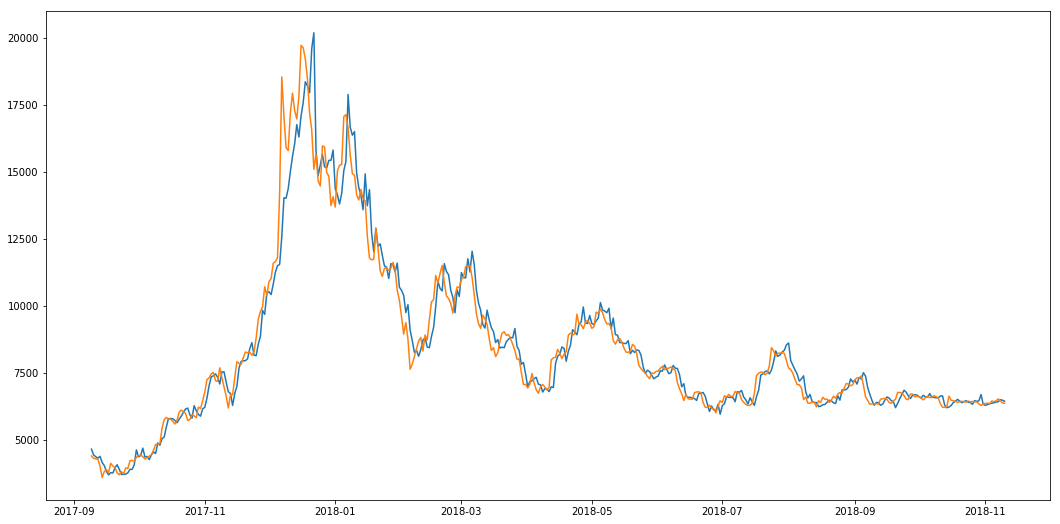

In [22]:
dates = daily_info["Date"][split + IN_TIMESTEPS:].values

Y_pred_plt = Y_pred_raw[::OUT_TIMESTEPS].reshape(-1)
Y_test_plt = Y_raw_test[::OUT_TIMESTEPS].reshape(-1)

dates = dates[:len(dates) - (len(dates) - len(Y_test_plt))]

plt.plot(dates, Y_pred_plt)
plt.plot(dates, Y_test_plt)

In [23]:
Y_pred = model.predict(X_train)
Y_pred_raw = (Y_pred + 1) *  X_raw_train[:,0,2][:,np.newaxis]

print(f'Train MAE: {np.abs(Y_pred_raw - Y_raw_train).mean()}')

Train MAE: 27.29016402155124
